# Useful Functions

In [ ]:
# function to decide whether we reject or fail to reject the null hypothesis based on the p-value
def interpret_p_value(p_value, alpha=0.05):
    """
    Interprets the significance of a given p-value.

    Parameters:
    - p_value (float): The p-value to interpret.
    - alpha (float): The significance level, default is 0.05.

    Returns:
    - str: Interpretation of the p-value.
    """

    if p_value < alpha:
        return f"The p-value is {p_value:.3f}. This is less than the significance level of {alpha}. Therefore, we reject the null hypothesis."
    else:
        return f"The p-value is {p_value:.3f}. This is greater than or equal to the significance level of {alpha}. Therefore, we fail to reject the null hypothesis."

# Libraries and Data

In [ ]:
## Libraries
# data analysis
import pandas as pd
import numpy as np
from scipy import stats
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive to access files in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the folder
%cd /content/drive/MyDrive//Business Analyst course/Advanced Analytics/Multivariate A-B Testing

/content/drive/MyDrive/Business Analyst course/Advanced Analytics/Multivariate A-B Testing


In [ ]:
# Load the CSV file
# A/B testing result data
df = pd.read_csv("ab_google.csv")
df.head(10)

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration
0,1,Original,Original,Original,3882
1,2,Rectangle,Original,Light Pink,3400
2,3,Original,Original,Original,3489
3,4,Original,Star,Light Pink,4320
4,5,Rectangle,Star,Light Pink,4333
5,6,Original,Star,Light Pink,2711
6,7,Rectangle,Star,Light Pink,3875
7,8,Original,Star,Light Pink,3124
8,9,Original,Star,Original,3148
9,10,Rectangle,Original,Light Pink,3405


# EDA

In [ ]:
# 1. Descriptive Statistics
df.describe()

,Participant ID,Session Duration
count,20000.000000,20000.000000
mean,10000.500000,3195.981050
std,5773.647028,515.170132
min,1.000000,776.000000
25%,5000.750000,2853.000000
50%,10000.500000,3193.000000
75%,15000.250000,3539.000000
max,20000.000000,5134.000000


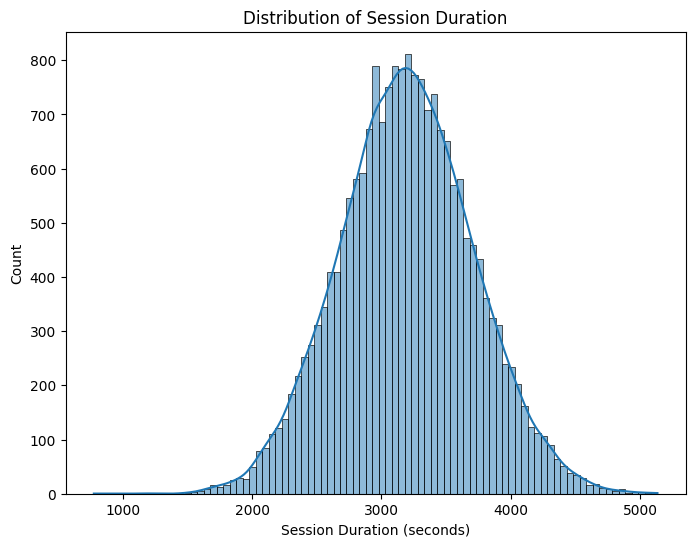

In [ ]:
# 2. Distribution Analysis
# histogram of the session duration
# A bell-shaped curve - normal / gaussian distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['Session Duration'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.show()

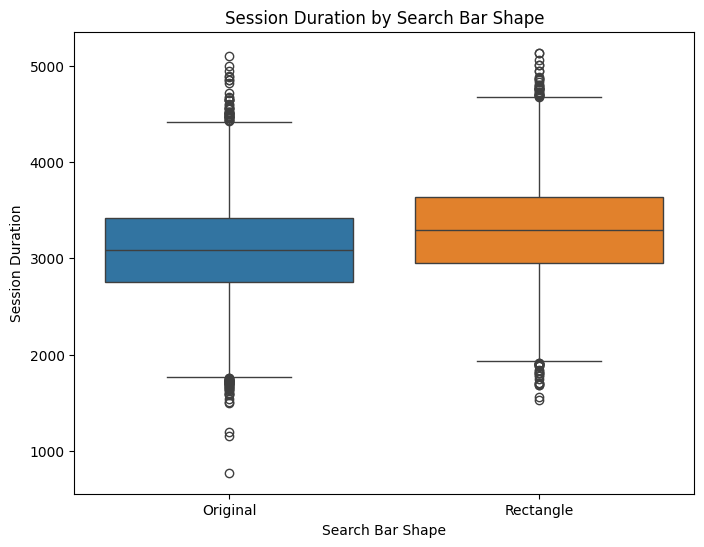

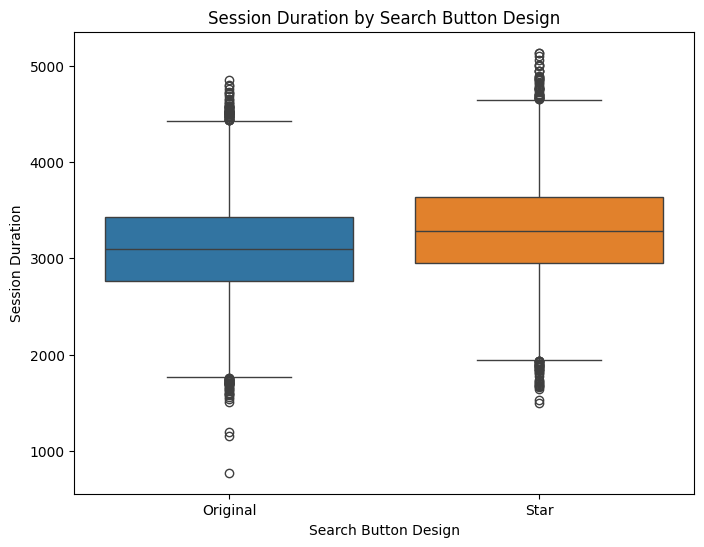

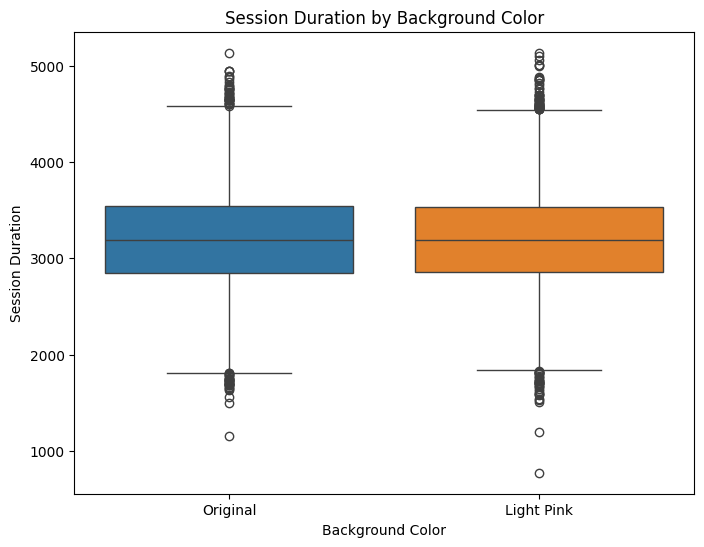

In [ ]:
# 3. Comparison of Session Duration by Design Elements

# original search bar vs. rectangle search bar
plt.figure(figsize=(8, 6))
sns.boxplot(x='Search Bar Shape', y='Session Duration', data=df)
plt.title('Session Duration by Search Bar Shape')
plt.show()

# original search button vs. star search button
plt.figure(figsize=(8, 6))
sns.boxplot(x='Search Button Design', y='Session Duration', data=df)
plt.title('Session Duration by Search Button Design')
plt.show()

# original background color vs. light pink background color
plt.figure(figsize=(8, 6))
sns.boxplot(x='Background Color', y='Session Duration', data=df)
plt.title('Session Duration by Background Color')
plt.show()

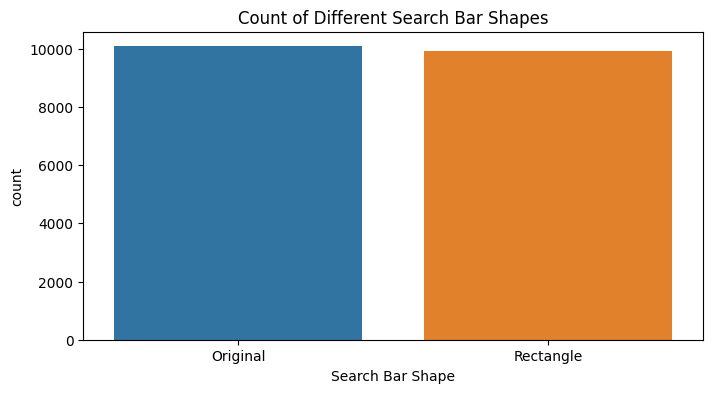

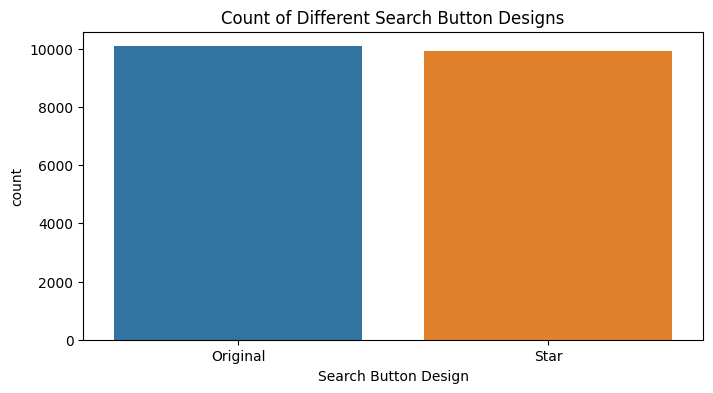

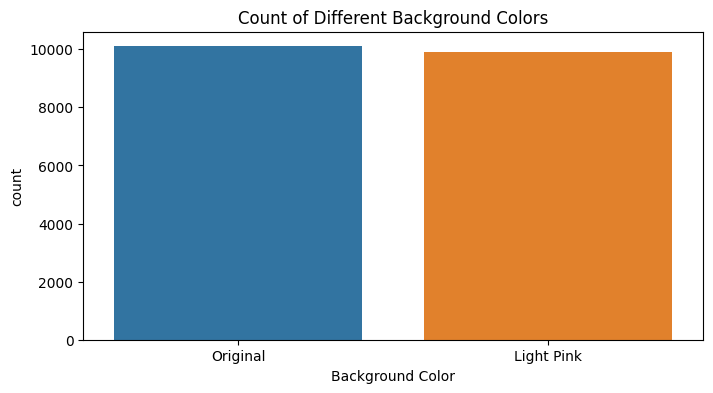

In [ ]:
# 4. Count of Different Design Elements

# original search bar vs. rectangle search bar
plt.figure(figsize=(8, 4))
sns.countplot(x='Search Bar Shape', data=df)
plt.title('Count of Different Search Bar Shapes')
plt.show()

# original search button vs. star search button
plt.figure(figsize=(8, 4))
sns.countplot(x='Search Button Design', data=df)
plt.title('Count of Different Search Button Designs')
plt.show()

# original background color vs. light pink background color
plt.figure(figsize=(8, 4))
sns.countplot(x='Background Color', data=df)
plt.title('Count of Different Background Colors')
plt.show()


# Full Factorial

In [ ]:
# Creating a new variable represing the 8 combinations of search bar, search button, and background color
df['Combination'] = df['Search Bar Shape'] + "_" + df['Search Button Design'] + "_" + df['Background Color']
df.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration,Combination
0,1,Original,Original,Original,3882,Original_Original_Original
1,2,Rectangle,Original,Light Pink,3400,Rectangle_Original_Light Pink
2,3,Original,Original,Original,3489,Original_Original_Original
3,4,Original,Star,Light Pink,4320,Original_Star_Light Pink
4,5,Rectangle,Star,Light Pink,4333,Rectangle_Star_Light Pink


In [ ]:
# Group by 'Combination', calculate mean of 'Session Duration', sort in ascending order, and reset index
average_duration = df.groupby('Combination')['Session Duration'].mean().sort_values().reset_index()
average_duration

,Combination,Session Duration
0,Original_Original_Original,2990.855487
1,Original_Original_Light Pink,3006.383643
2,Original_Star_Original,3184.725366
3,Original_Star_Light Pink,3189.628900
4,Rectangle_Original_Light Pink,3204.903800
5,Rectangle_Original_Original,3207.471297
6,Rectangle_Star_Light Pink,3387.574797
7,Rectangle_Star_Original,3409.633373


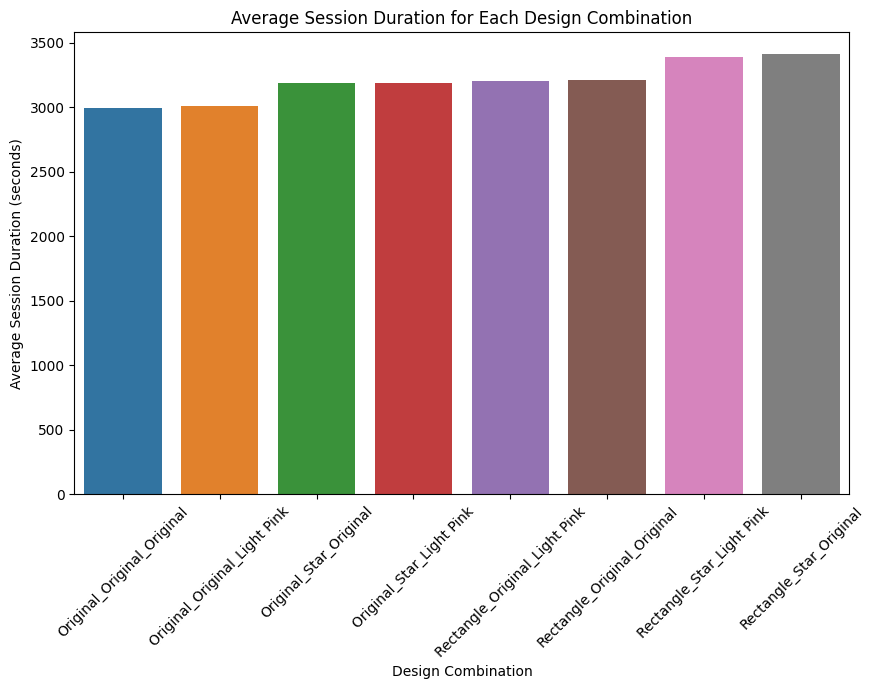

In [ ]:
# Create a bar plot to visualize the average session duration for each design combination
plt.figure(figsize=(10, 6))
sns.barplot(x='Combination', y='Session Duration', data=average_duration)
plt.xticks(rotation=45)
plt.title('Average Session Duration for Each Design Combination')
plt.xlabel('Design Combination')
plt.ylabel('Average Session Duration (seconds)')
plt.show()

In [ ]:
# Extract the session duration for each combination
grouped = df.groupby('Combination')['Session Duration']

**Null hypothesis (H0)**: There is no influence of the variants in the Session duration

**Alternative Hypothesis (H1)**: The Variants influence the Session value

In [ ]:
# Perform ANOVA on groups of data to test for significant differences in means
F, p_value = stats.f_oneway(*[group for name, group in grouped])
# interpret the p-value from ANOVA test
interpret_p_value(p_value, alpha = 0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [ ]:
# Perform the Tukey's HSD test to conduct pairwise comparison of means for different groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['Session Duration'],
                          groups = df['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
 Original_Original_Light Pink    Original_Original_Original -15.5282 0.9523 -57.4919  26.4356  False
 Original_Original_Light Pink      Original_Star_Light Pink 183.2453    0.0 140.6391 225.8514   True
 Original_Original_Light Pink        Original_Star_Original 178.3417    0.0 136.1283 220.5551   True
 Original_Original_Light Pink Rectangle_Original_Light Pink 198.5202    0.0 156.0811 240.9592   True
 Original_Original_Light Pink   Rectangle_Original_Original 201.0877    0.0 158.7219 243.4534   True
 Original_Original_Light Pink     Rectangle_Star_Light Pink 381.1912    0.0 338.6911 423.6912   True
 Original_Original_Light Pink       Rectangle_Star_Original 403.2497    0.0 360.8925 445.60

# Partial Factorial

In [ ]:
# The 8 combinations of search bar, search button, and background color
df.Combination.unique()

array(['Original_Original_Original', 'Rectangle_Original_Light Pink',
       'Original_Star_Light Pink', 'Rectangle_Star_Light Pink',
       'Original_Star_Original', 'Original_Original_Light Pink',
       'Rectangle_Star_Original', 'Rectangle_Original_Original'],
      dtype=object)

In [ ]:
# Selecting some of the combinations for testing
selection = ['Original_Original_Original',
             'Rectangle_Original_Light Pink',
             'Rectangle_Star_Light Pink',
             'Original_Star_Original']

In [ ]:
# Filter the DF for only the selected combinations
df_partial = df[df['Combination'].isin(selection)]

In [ ]:
# Extract the session duration for each combination
grouped_partial = df_partial.groupby('Combination')['Session Duration']

**Null hypothesis (H0)**: There is no influence of the variants in the Session duration

**Alternative Hypothesis (H1)**: The Variants influence the Session value

In [ ]:
# Perform ANOVA on groups of data to test for significant differences in means
F, p_value = stats.f_oneway(*[group for name, group in grouped_partial])
# interpret the p-value from ANOVA test
interpret_p_value(p_value, alpha = 0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [ ]:
# Perform the Tukey's HSD test to conduct pairwise comparison of means for different groups
tukey = pairwise_tukeyhsd(endog = df_partial['Session Duration'],
                          groups = df_partial['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
   Original_Original_Original        Original_Star_Original 193.8699    0.0 158.4493 229.2904   True
   Original_Original_Original Rectangle_Original_Light Pink 214.0483    0.0 178.4363 249.6603   True
   Original_Original_Original     Rectangle_Star_Light Pink 396.7193    0.0 361.0555 432.3831   True
       Original_Star_Original Rectangle_Original_Light Pink  20.1784 0.4697  -15.643  55.9999  False
       Original_Star_Original     Rectangle_Star_Light Pink 202.8494    0.0 166.9765 238.7224   True
Rectangle_Original_Light Pink     Rectangle_Star_Light Pink  182.671    0.0  146.609  218.733   True
-------------------------------------------------------------------------------------------

In [ ]:
# Encode categorical variables using one-hot encoding, dropping the first category to avoid multicollinearity
df_encoded = pd.get_dummies(df_partial,
                            columns=['Search Bar Shape',
                                     'Search Button Design',
                                     'Background Color'],
                            drop_first=True)

In [ ]:
# Preview the data
df_partial.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration,Combination
0,1,Original,Original,Original,3882,Original_Original_Original
1,2,Rectangle,Original,Light Pink,3400,Rectangle_Original_Light Pink
2,3,Original,Original,Original,3489,Original_Original_Original
4,5,Rectangle,Star,Light Pink,4333,Rectangle_Star_Light Pink
6,7,Rectangle,Star,Light Pink,3875,Rectangle_Star_Light Pink


In [ ]:
# Rename columns to remove spaces
df_encoded.columns = [col.replace(' ', '_') for col in df_encoded.columns]
df_encoded.head()

,Participant_ID,Session_Duration,Combination,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
0,1,3882,Original_Original_Original,False,False,True
1,2,3400,Rectangle_Original_Light Pink,True,False,False
2,3,3489,Original_Original_Original,False,False,True
4,5,4333,Rectangle_Star_Light Pink,True,True,False
6,7,3875,Rectangle_Star_Light Pink,True,True,False


In [ ]:
from itertools import product

In [ ]:
# Define the feature states for each possible combination
feature_values = {
    'Search_Bar_Shape_Rectangle': [1, 0], # 1 for Rectangle, 0 for Original
    'Search_Button_Design_Star': [1, 0], # 1 for Star, 0, for Original
    'Background_Color_Original': [1, 0] # 1 for Original, 0 for Light Pink
}

# Generate all possible combinations of the feature states (8 combinations in total)
all_combinations = list(product(*feature_values.values()))
all_combinations

[(1, 1, 1),
 (1, 1, 0),
 (1, 0, 1),
 (1, 0, 0),
 (0, 1, 1),
 (0, 1, 0),
 (0, 0, 1),
 (0, 0, 0)]

### Regression Analysis

In [ ]:
import statsmodels.api as sm

In [ ]:
# Isolate the target variable (y) and feature variables (X) for modeling
y = df_encoded['Session_Duration']  # Target variable: Session Duration
X = df_encoded[['Search_Bar_Shape_Rectangle',
                'Search_Button_Design_Star',
                'Background_Color_Original']]  # Feature variables: Encoded search bar shape, button design, and background color

In [ ]:
# add a constant
X_constant = sm.add_constant(X)

In [ ]:
# Fit a linear regression model to the data and display the summary of the results
model = sm.OLS(y, X).fit()  # Create and fit the Ordinary Least Squares (OLS) regression model
model.summary()            # Output the summary of the regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Session_Duration   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     410.0
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          7.07e-172
Time:                        13:50:36   Log-Likelihood:                -76564.
No. Observations:               10049   AIC:                         1.531e+05
Df Residuals:                   10046   BIC:                         1.532e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Search_Bar_Shape_Rectangle  3202.0619      8.560    374.051      0.000    3185.282    3218.842
Search_Button_Design_Star    188.3709      9.834     19.154      0.000     169.094     207.648
Background_Color_Original   2993.5722      8.432    355.013      0.000    2977.043    3010.101
==============================================================================
Omnibus:                        5.993   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.008
Skew:                           0.054   Prob(JB):                       0.0496
Kurtosis:                       2.948   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Remove outliers
- This step helps in ensuring that extreme values do not disproportionately affect the regression model


Check for multicollinearity
- High multicollinearity can lead to unstable and unreliable regression coefficients, make it difficult to interpret the effect of each predictor, and reduce model accuracy.
- Identifying multicollinearity helps in ensuring a more stable, interpretable, and reliable regression model.


In [ ]:
# Calculate and display the correlation matrix of the feature variables in X_constant
X_constant.corr()

,const,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
const,NaN,NaN,NaN,NaN
Search_Bar_Shape_Rectangle,NaN,1.000000,0.004544,-1.000000
Search_Button_Design_Star,NaN,0.004544,1.000000,-0.004544
Background_Color_Original,NaN,-1.000000,-0.004544,1.000000


When the inputs are just dummy variables, you don't add a constant to the predictor
- This is because dummy variables already account for the intercept in the model
- Adding an additional constant could lead to multicollinearity issues or redundancy, as it would introduce perfect multicollinearity with the dummy variables

If you pursue Regression Analysis, you need to create interaction terms for the variants
- Interaction terms help you see how the effect of one predictor on the response changes depending on the value of another predictor
- This helps in understanding and modeling more complex relationships between predictors, which can improve the accuracy and interpretability of the regression model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Split the data into training and test sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,     # 20% of the data for testing
                                                    random_state=1502) # Set random seed for reproducibility

X_train.head()

,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
10729,False,True,True
3954,True,True,False
13474,True,False,False
9699,False,False,True
17547,False,False,True


In [ ]:
# Build and train a Random Forest Regressor model with 10 trees using the training data
model2 = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)

In [ ]:
# Making predictions on the test set
y_pred = model2.predict(X_test)
y_pred

array([3199.41490726, 2993.17324084, 3199.41490726, ..., 3199.41490726,
       3382.15773512, 2993.17324084])

In [ ]:
# Calculate MAE and MAPE
# MAE: Average absolute difference between predicted and actual values
# MAPE: Average percentage difference between predicted and actual values
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.91183150155456
The MAPE is 0.12909932997085738


### Parameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],            # Number of trees in the forest
    'max_depth': [None, 1, 3],                # Maximum depth of the trees
    'min_samples_split': [2, 4, 6],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5]             # Minimum number of samples required to be at a leaf node
}


In [ ]:
# Initialize a Random Forest Regressor model
rf = RandomForestRegressor(random_state = 1502)

In [ ]:
# Set up Grid Search with Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,                          # Random Forest model
    param_grid=param_grid,                 # Parameter grid to search
    scoring="neg_mean_absolute_error",     # Evaluation metric (negative MAE)
    n_jobs=3,                              # Number of parallel jobs
    cv=5,                                  # 5-fold cross-validation
    verbose=2                              # Verbosity level
)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1502), n_jobs=3,
             param_grid={'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f"The Best parameters are {best_params}")

The Best parameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Build and train a Random Forest model using the best hyperparameters found from Grid Search
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [ ]:
# Calculate MAE and MAPE
# MAE: Average absolute difference between predicted and actual values
# MAPE: Average percentage difference between predicted and actual values
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.9257474624548
The MAPE is 0.12924904227460726


### Infer the untested variants

In [ ]:
# Generate predictions for all feature combinations and store results
predictions = []
for combinations in all_combinations:
    # Create a dictionary for the current combination
    variant = dict(zip(feature_values.keys(), combinations))

    # Convert dictionary to DataFrame and predict duration
    X_variant = pd.DataFrame([variant])
    predicted_duration = best_model.predict(X_variant)[0]

    # Construct a name for the variant based on feature states
    variant_name = '_'.join([
        'Rectangle' if variant['Search_Bar_Shape_Rectangle'] else 'Original',
        'Star' if variant['Search_Button_Design_Star'] else 'Original',
        'Original' if variant['Background_Color_Original'] else 'Light Pink'
    ])

    # Append the variant name and predicted duration to the results
    predictions.append((variant_name, predicted_duration))


predictions

[('Rectangle_Star_Original', 3302.6491151525784),
 ('Rectangle_Star_Light Pink', 3386.7370206142396),
 ('Rectangle_Original_Original', 3118.5409348229614),
 ('Rectangle_Original_Light Pink', 3202.9718280252428),
 ('Original_Star_Original', 3185.293035091011),
 ('Original_Star_Light Pink', 3269.3809405526727),
 ('Original_Original_Original', 2990.0359940523517),
 ('Original_Original_Light Pink', 3074.466887254633)]

In [ ]:
# Create a DataFrame from the predictions and sort by predicted session duration
prediction_table = pd.DataFrame(
    predictions,
    columns = ['Combination', 'Predicted Session Duration']
).sort_values(by = "Predicted Session Duration")
prediction_table

,Combination,Predicted Session Duration
6,Original_Original_Original,2990.035994
7,Original_Original_Light Pink,3074.466887
2,Rectangle_Original_Original,3118.540935
4,Original_Star_Original,3185.293035
3,Rectangle_Original_Light Pink,3202.971828
5,Original_Star_Light Pink,3269.380941
0,Rectangle_Star_Original,3302.649115
1,Rectangle_Star_Light Pink,3386.737021


In [ ]:
# Merge the average duration and predictions DataFrames
comparison_table = pd.merge(
    average_duration,
    prediction_table,
    on = "Combination"
)

# Calculate the percentage error between predicted and average session durations
comparison_table["Error_Percentage"] = 100 * (
    comparison_table["Predicted Session Duration"] - comparison_table['Session Duration']) / comparison_table['Session Duration']
comparison_table

,Combination,Session Duration,Predicted Session Duration,Error_Percentage
0,Original_Original_Original,2990.855487,2990.035994,-0.027400
1,Original_Original_Light Pink,3006.383643,3074.466887,2.264623
2,Original_Star_Original,3184.725366,3185.293035,0.017825
3,Original_Star_Light Pink,3189.628900,3269.380941,2.500355
4,Rectangle_Original_Light Pink,3204.903800,3202.971828,-0.060282
5,Rectangle_Original_Original,3207.471297,3118.540935,-2.772600
6,Rectangle_Star_Light Pink,3387.574797,3386.737021,-0.024731
7,Rectangle_Star_Original,3409.633373,3302.649115,-3.137706


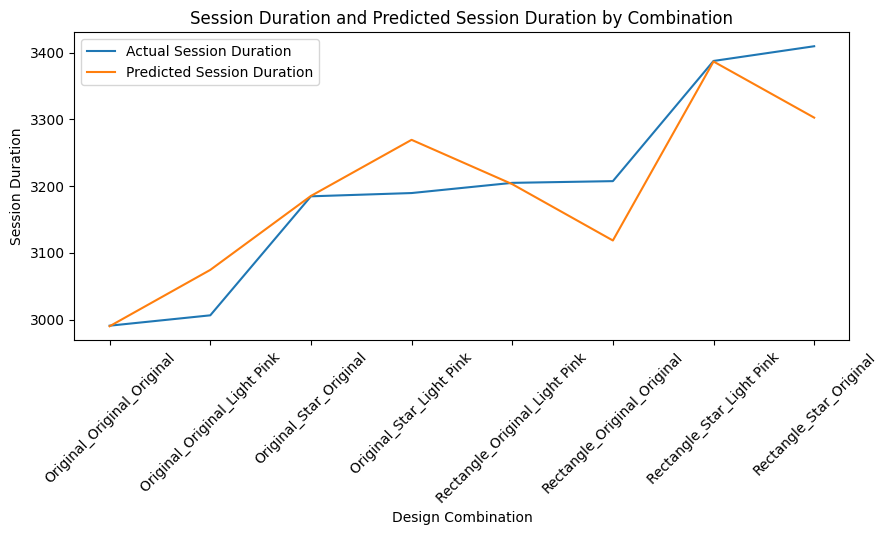

In [ ]:
 # Line Chart for Session Durations and Predictions
plt.figure(figsize=(10, 4))

# Plot actual session durations
plt.plot(comparison_table['Combination'],
         comparison_table['Session Duration'],
         label='Actual Session Duration')

# Plot predicted session durations
plt.plot(comparison_table['Combination'],
         comparison_table['Predicted Session Duration'],
         label='Predicted Session Duration')

# Display settings
plt.xticks(rotation=45)
plt.title('Session Duration and Predicted Session Duration by Combination')
plt.xlabel('Design Combination')
plt.ylabel('Session Duration')
plt.legend()
plt.show()